# Customer Churn

- [1 - Introduction](#Introduction)
    - [1.1 - Project Overview](#Project-Overview)
    - [1.2 - Problem Statement](#Problem-Statement)
    - [1.3 - Dataset Description](#Dataset-Description)

- [2 - Import Libraries](#Import-Libraries)

- [3 - Data Loading and Exploration](#Data-Loading-and-Exploration)
    - [3.1 - Load the Dataset](#Load-the-Dataset)
    - [3.2 - Display Basic Information](#Display-Basic-Information)
    - [3.3 - Show Summary Statistics](#Show-Summary-Statistics)
    
- [4 - Data Preprocessing](#Data-Preprocessing)
    - [4.1 - Handle Missing Values](#Handle-Missing-Values)
    - [4.2 - Encode Categorical Variables](#Encode-Categorical-Variables)
    - [4.3 - Feature Scaling](#Feature-Scaling)

- [5 - Data Splitting](#Data-Splitting)
    - [5.1 - Split into Train, Validation, and Test Sets](#Split-into-Train-Validation-and-Test-Sets)
    - [5.2 - Split Data into Features (X) and Target (y)](#Split-Data-into-Features-X-and-Target-y)


- [6 - Model Definition and Training](#Model-Definition)
    - [6.1 - Define the Logistic Regression Model using Sklearn](#Define-the-Logistic-Regression-Model-using-Sklearn)
    - [6.2 - Train the Model](#Train-the-Model)
    - [6.3 - Evaluating Model on Validation Set](#Validation-During-Training)

- [7 - Hypertuning of Model](#Hypertuning-of-Model)

- [8 - Model Evaluation](#Model-Evaluation)
    - [8.1 - Confusion Matrix and Scores](#Confusion-Matrix-and-Scores)
    - [8.2 - ROC Curve](#ROC-Curve)

- [9 - Conclusion and Future Work](#Conclusion-and-Future-Work)

# [1 - Introduction](#Introduction)

## [1.1 - Project Overview](#Project-Overview)
The goal of this project is to develop a predictive model that can identify customers who are likely to churn. Customer churn, or customer attrition, refers to the loss of clients or customers. Predicting customer churn is crucial for businesses as it helps in retaining customers, improving customer satisfaction, and increasing profitability. By analyzing various customer-related data, we aim to build a machine learning model that can effectively predict the likelihood of a customer leaving the service.

## [1.2 - Problem Statement](#Problem-Statement)
Customer churn is a significant problem for businesses, leading to a loss in revenue and increased costs for acquiring new customers. The challenge lies in identifying which customers are at risk of churning before they actually do. This project aims to address the following questions:

1. Can we build an accurate model to predict customer churn using historical customer data?
2. How can we interpret the model's predictions to provide actionable insights for the business to reduce churn rates?

By addressing these questions, we aim to provide a valuable tool for businesses to proactively manage customer relationships and improve retention strategies.

## [1.3 - Dataset Description](#Dataset-Description)
The dataset used in this project is sourced from Kaggle and pertains to a fictional telco company that provided home phone and Internet services to 7043 customers in California.

### Telco Customer Churn
Each row in the dataset represents a customer, and each column contains various attributes describing the customers, as detailed in the column metadata.

- **Number of Rows:** 7043 (customers)
- **Number of Columns:** 21 (features)
- **Target Column:** "Churn"

### Data Composition
The dataset includes the following information:

- **Churn Information:**
  - Customers who left within the last month (indicated in the "Churn" column).

- **Services Signed Up:**
  - Phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming TV, and streaming movies.

- **Customer Account Information:**
  - Duration of customer relationship, contract type, payment method, paperless billing, monthly charges, and total charges.

- **Demographic Information:**
  - Gender, age range, and whether the customer has partners and dependents..



# [2 - Import Libraries](#Import-Libraries)

In this section, we import the necessary libraries required for data manipulation, visualization, and building a machine learning model using Sklearn.


In [432]:
# Basic libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn for data preprocessing, building, training the model and evaluation
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import GridSearchCV


## [4.4 - Split Data into Features (X) and Target (y)](#Split-Data-into-Features-X-and-Target-y)

In this section, we will divide our dataset into two main components: Features (X) and the target variable (y). The features (X) consist of all the independent variables that will be used as input to the model, while the target variable (y) represents the outcome we aim to predict—in this case, customer churn. This separation is crucial for training and evaluating the model effectively.



# [3 - Data Loading and Exploration](#Data-Loading-and-Exploration)

## [3.1 - Load the Dataset](#Load-the-Dataset)

In this section, we will load the Telco Customer Churn dataset into a pandas DataFrame for further exploration and analysis.

In [433]:
# Load the dataset into a pandas DataFrame
data_path = './WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset to verify loading
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## [3.2 - Display Basic Information](#Display-Basic-Information)

In this section, we will display basic information about the dataset to understand its structure and contents.


In [434]:
# Display the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## [3.3 - Summary Statistics](#Show-Summary-Statistics)

In this section, we will present detailed statistics about the customers in the dataset. 
These statistics provide insights into the characteristics and demographics of the customer base, helping to better understand the types of customers represented.


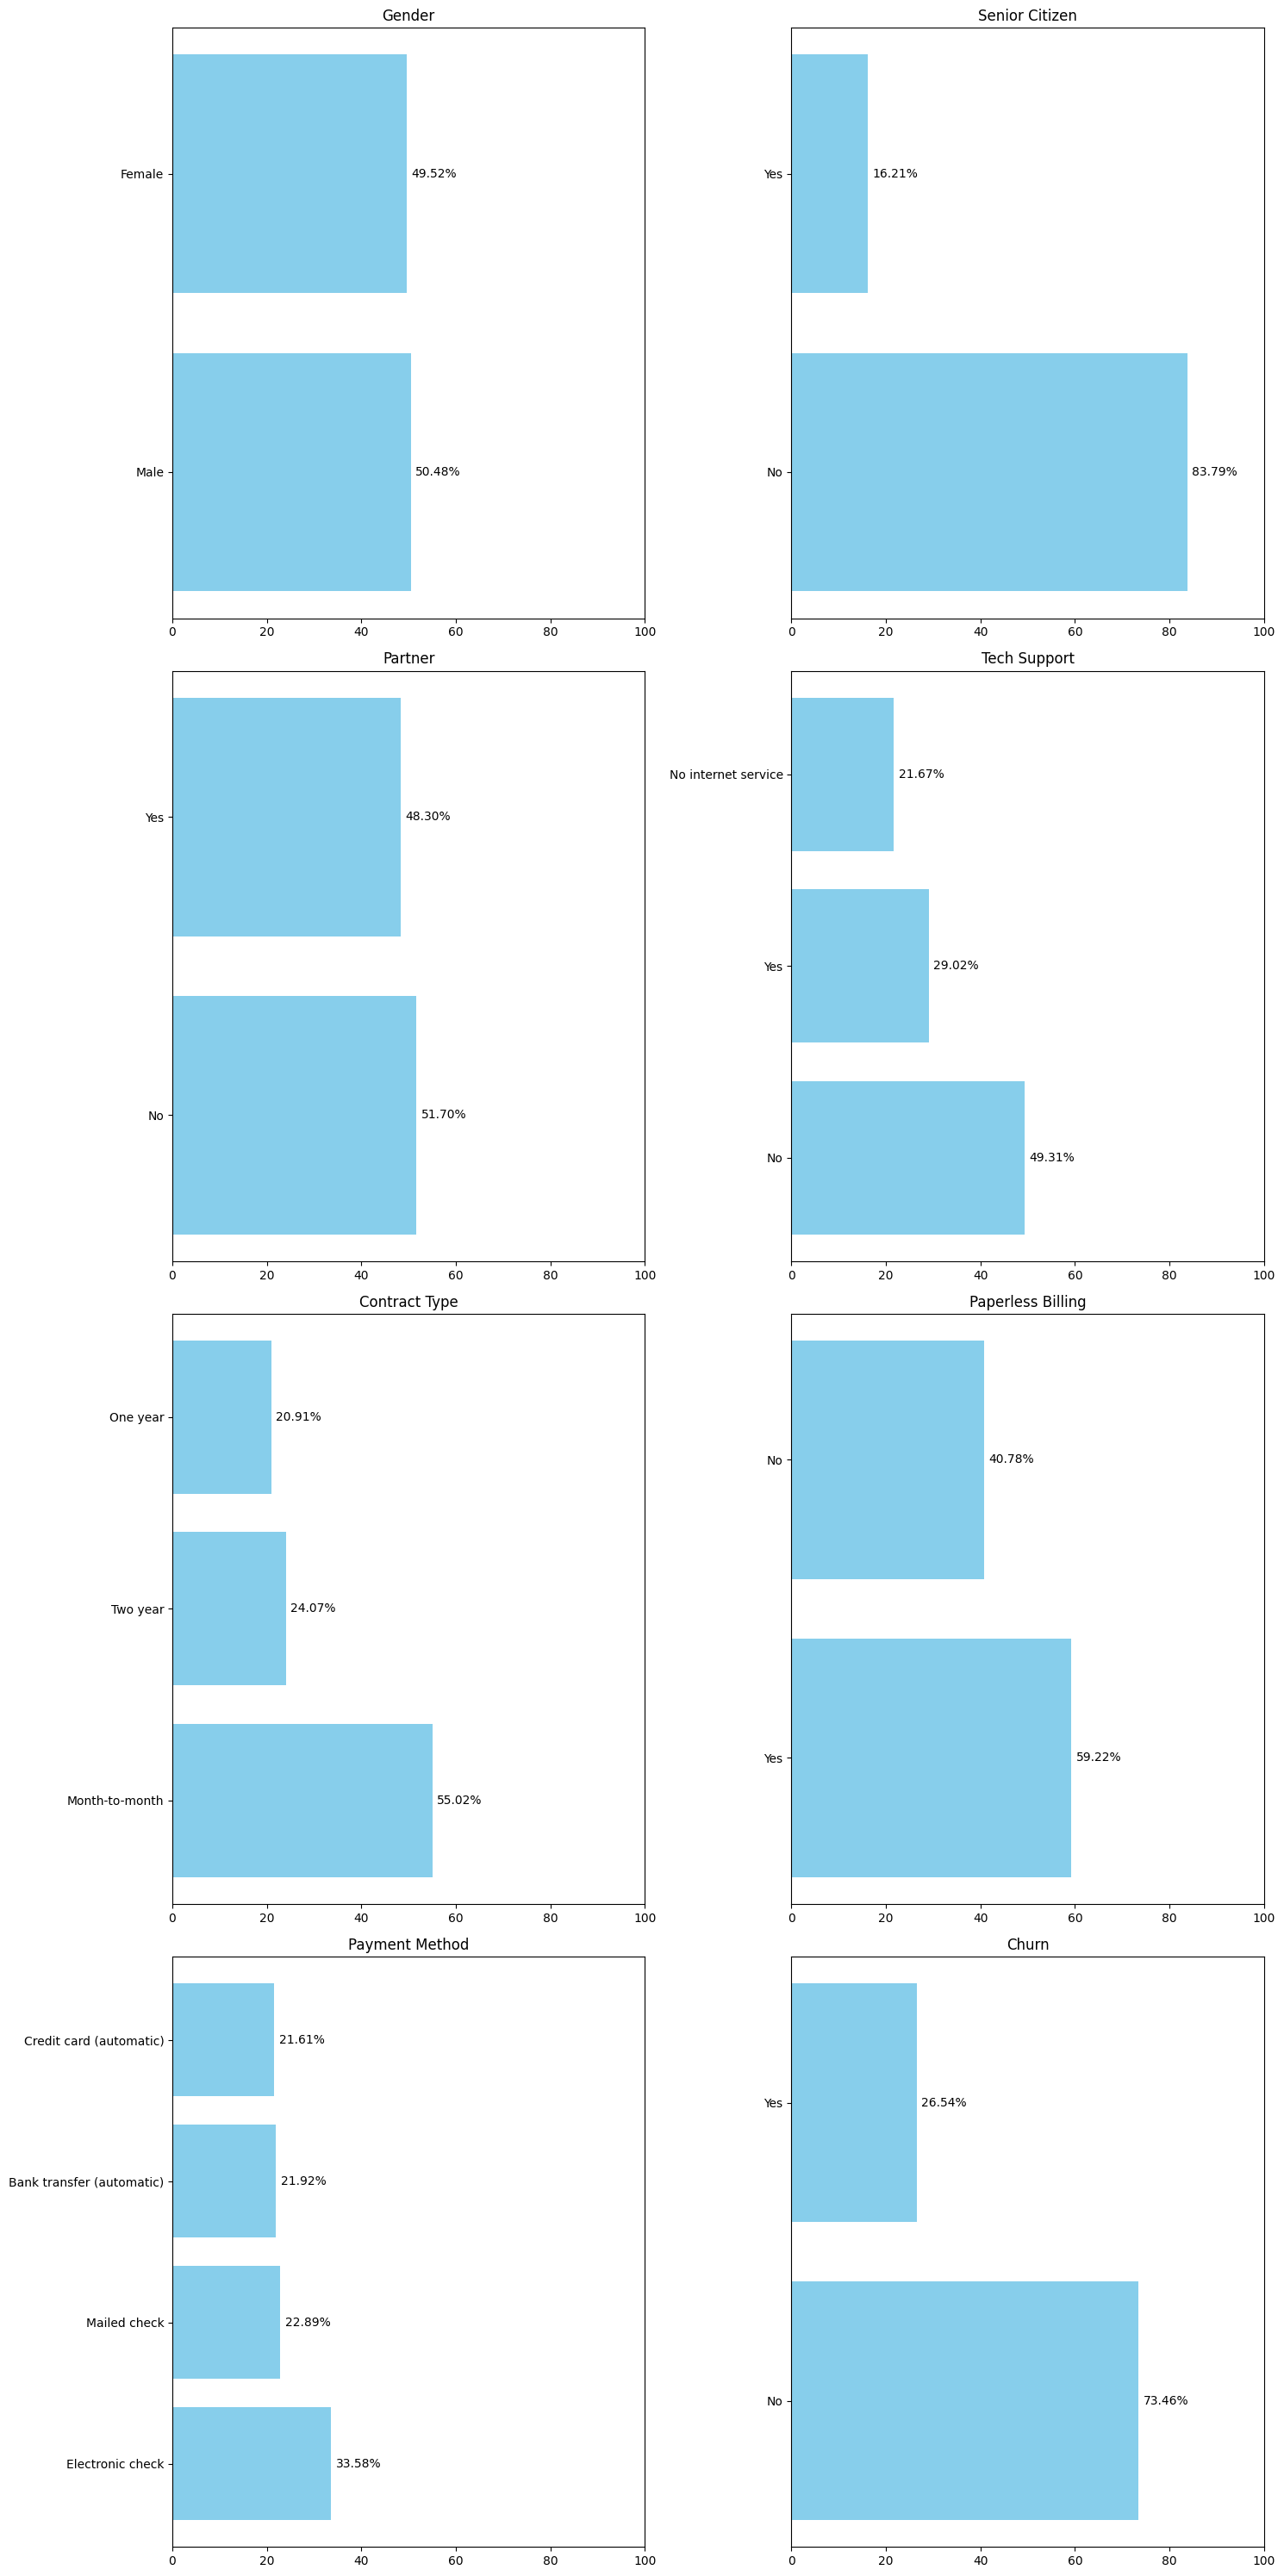

In [435]:
# Prepare data for plotting
categories = [
    "Gender", "Senior Citizen", "Partner", "Tech Support", 
    "Contract Type", "Paperless Billing", "Payment Method", "Churn"
]

# Create a dictionary to store distributions
distributions = {
    "Gender": df['gender'].value_counts(normalize=True) * 100,
    "Senior Citizen": df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'}).value_counts(normalize=True) * 100,
    "Partner": df['Partner'].value_counts(normalize=True) * 100,
    "Tech Support": df['TechSupport'].value_counts(normalize=True) * 100,
    "Contract Type": df['Contract'].value_counts(normalize=True) * 100,
    "Paperless Billing": df['PaperlessBilling'].value_counts(normalize=True) * 100,
    "Payment Method": df['PaymentMethod'].value_counts(normalize=True) * 100,
    "Churn": df['Churn'].value_counts(normalize=True) * 100

}

# Plot the distributions
fig, axs = plt.subplots(4, 2, figsize=(15, 30))
axs = axs.flatten()

for i, category in enumerate(categories):
    distribution = distributions[category]
    axs[i].barh(distribution.index, distribution.values, color='skyblue')
    axs[i].set_title(category)
    axs[i].set_xlim(0, 100)
    for j in range(len(distribution)):
        axs[i].text(distribution.values[j] + 1, j, f"{distribution.values[j]:.2f}%", va='center')

# Hide the last subplot if categories are odd in number
if len(categories) % 2 != 0:
    axs[-1].axis('off')

plt.tight_layout()
plt.show()

# [4 - Data Preprocessing](#Data-Preprocessing)

## [4.1 - Handle Missing Values](#Handle-Missing-Values)

In this section, we will identify and handle missing values in the dataset to ensure the data is clean and ready for modeling.

In [436]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In this section, we examined the dataset for any missing values. After conducting the analysis, we found that there are no missing values in any of the columns. 
This indicates that the dataset is complete, and no further action is needed to handle missing data.

## [4.2 - Encode Categorical Variables](#Encode-Categorical-Variables)

In this section, we will remove the `customerID` column and encode the categorical variables in the dataset to prepare them for modeling.



In [437]:
# Remove the customerID column
df = df.drop(columns=['customerID'])

# Cast TotalCharges to numerical data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many NaN values are in TotalCharges after conversion
nan_count = df['TotalCharges'].isnull().sum()
if nan_count > 0:
    print(f"TotalCharges has {nan_count} missing values.")
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
    print("Filled the missing values with the median value.")
    print(f"TotalCharges has {df['TotalCharges'].isnull().sum()} missing values after filling.")

# One-Hot Encode all categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the first few rows of the encoded DataFrame to verify
df_encoded.head()

df = df_encoded


TotalCharges has 11 missing values.
Filled the missing values with the median value.
TotalCharges has 0 missing values after filling.


## [4.3 - Feature Scaling](#Feature-Scaling)

In this section, we will apply feature scaling and normalization to ensure that all features contribute equally to the model, as algorithms like logistic regression can be sensitive to the scale of input data. This step is crucial to improve the model's performance by preventing features with larger ranges from dominating the learning process.

In [438]:
def filter_columns_to_scale(df):
    # Select numerical columns (float and int types)
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Filter out binary columns (those with only two unique values)
    columns_to_scale = [col for col in numerical_columns if df[col].nunique() > 4]
    
    return columns_to_scale

# Apply the function to the dataframe
columns_to_scale = filter_columns_to_scale(df)

# Display the columns that need to be scaled
print("Columns to be scaled:")
print(columns_to_scale)


Columns to be scaled:
['tenure', 'MonthlyCharges', 'TotalCharges']


We will now scale the Tenure, MonthlyCharges, and TotalCharges features by using Z-score Normalization to ensure consistent input ranges, which is important for the model's performance.

In [439]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply Z-Score normalization to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows to verify the scaling
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


# [5 - Data Splitting](#Data-Splitting)

## [5.1 Split into Train, Validation, and Test Sets](#Split-into-Train-Validation-and-Test-Sets)


In this chapter, we will split the dataset into training, validation, and testing sets. 
This step is essential to evaluate the model's performance, tune hyperparameters, and ensure its generalizability to unseen data.


In [440]:
# First, split the data into training + validation and test sets (80% train+validation, 20% test)
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn_Yes'])

# Next, split the training + validation set into separate training and validation sets (75% train, 25% validation)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify=train_val_df['Churn_Yes'])

# Display the sizes of each set to verify the split
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))

Training set size: 4225
Validation set size: 1409
Test set size: 1409


## [5.2 - Split Data into Features (X) and Target (y)](#Split-Data-into-Features-X-and-Target-y)

In this section, we will divide our dataset into two main components: Features (X) and the target variable (y). The features (X) consist of all the independent variables that will be used as input to the model, while the target variable (y) represents the outcome we aim to predict—in this case, customer churn. This separation is crucial for training and evaluating the model effectively.



In [441]:
# Define the target column
target_column = 'Churn_Yes'

# Split the training set into features (X_train) and target (y_train)
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column].astype(int)

# Split the validation set into features (X_val) and target (y_val)
X_val = val_df.drop(columns=[target_column])
y_val = val_df[target_column].astype(int)

# Split the test set into features (X_test) and target (y_test)
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column].astype(int)

# Display the first few rows of each to verify
print("Training features (X_train):")
print(X_train.head())
print("\nTraining target (y_train):")
print(y_train.head())

print("\nValidation features (X_val):")
print(X_val.head())
print("\nValidation target (y_val):")
print(y_val.head())

print("\nTest features (X_test):")
print(X_test.head())
print("\nTest target (y_test):")
print(y_test.head())

Training features (X_train):
      SeniorCitizen    tenure  MonthlyCharges  TotalCharges  gender_Male  \
2312              0 -0.585198       -1.484373     -0.830011         True   
5227              0 -1.033122        1.044882     -0.725006         True   
6404              0  0.799294        1.480273      1.522877         True   
88                0  0.554972       -1.489359     -0.598124        False   
6496              1  0.310650        1.232665      0.796599         True   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
2312        False           False              True   
5227        False           False              True   
6404        False           False              True   
88           True            True              True   
6496         True           False              True   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
2312                           False              False  ...   
5227                           False               True

# [6 - Model Definition](#Model-Definition)
## [6.1 - Define the Logistic Regression Model using Sklearn](#Define-the-Logistic-Regression-Model-using-Sklearn)

In this section we will define the Logistic Regression Model using Sklearn

In [442]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(solver = 'lbfgs', random_state=42, max_iter=1000)

# [6.2 - Train the Model](#Train-the-Model)

In this section we will train the Model on the training set

In [443]:
# Fit the model
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## [6.3 - Evaluate the Model on Validation Set](#Evaluate-the-Model-on-Validation-Set)

In this section, we will evaluate the performance of the trained logistic regression model on the validation set. This step is crucial to assess how well the model generalizes to unseen data and to make any necessary adjustments or improvements.

In [444]:
# Predict on the validation set
y_val_pred = logistic_model.predict(X_val)

# Evaluate the model's performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print the evaluation metrics
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}")

Validation Accuracy: 0.8027
Validation Precision: 0.6589
Validation Recall: 0.5321
Validation F1 Score: 0.5888


# [7 - Hypertuning of Model](#Hypertuning-of-Model)

In this section, we will perform hyperparameter tuning to optimize the performance of our model. Hyperparameters are parameters that are not learned from the data but are set before training the model. By tuning these hyperparameters, we can find the best combination that maximizes the model's performance.

In [445]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")
print(f"Best model: {best_model}")

logistic_model = best_model


Best parameters: {'C': 1, 'solver': 'liblinear'}
Best model: LogisticRegression(C=1, max_iter=1000, random_state=42, solver='liblinear')


# [8 - Model Evaluation](#Model-Evaluation)

## [8.1 - Confusion Matrix and Scores](#Confusion-Matrix-and-Scores)

In this section, we will evaluate the performance of our trained logistic regression model on the test set. Model evaluation is crucial to assess how well the model generalizes to unseen data and to make informed decisions about its effectiveness.


In this section, we will plot the Receiver Operating Characteristic (ROC) curve to evaluate the performance of our model on the validation set.

### Confusion Matrix

A confusion matrix is a table that summarizes the performance of a classification model. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) predicted by the model.

### Accuracy

Accuracy is a commonly used metric to evaluate classification models. It measures the proportion of correctly classified instances out of the total number of instances.

### Precision

Precision is a metric that measures the proportion of true positive predictions out of the total number of positive predictions. It indicates how precise the model is in predicting positive instances.

### Recall

Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of the total number of actual positive instances. It indicates how well the model identifies positive instances.

### F1 Score

The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall.

Let's evaluate our logistic regression model on the test set and calculate these metrics.

In [446]:
# Predict on the test set
y_test_pred = logistic_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_test_pred)
print(f"Recall: {recall:.4f}")

# F1 Score  
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1:.4f}")

[[924 111]
 [170 204]]
Accuracy: 0.8006
Precision: 0.6476
Recall: 0.5455
F1 Score: 0.5922


The most critical error in our model's predictions occurs when customers who are likely to churn are incorrectly classified as not churning. The rate of these misclassifications is as follows:

In [447]:
# All Predictions
all_predictions = y_test_pred.shape[0]

# False Negatives
false_negatives = conf_matrix[1][0]

# Calculate the Critical Errors Rate
critical_errors_rate = false_negatives / all_predictions

print(f"Critical Errors Rate: {critical_errors_rate:.4f}")

Critical Errors Rate: 0.1207


## [8.2 - ROC Curve](#ROC-Curve)

In this section, we will plot the Receiver Operating Characteristic (ROC) curve to evaluate the performance of our model on the validation set.

AUC: 0.8432


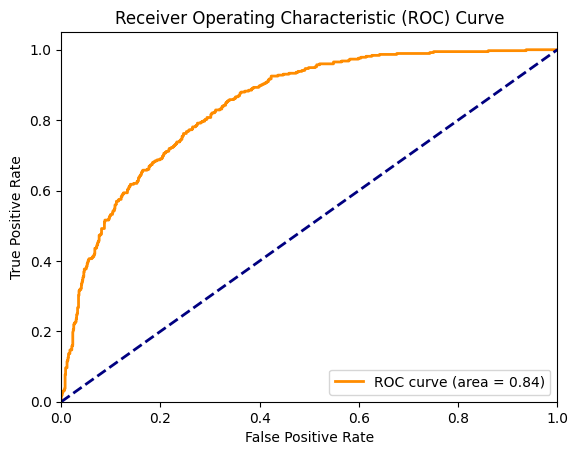

Optimal Threshold: inf


In [449]:
# Predict probabilities for the positive class
y_test_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

desired_fpr = 0.1
idx = np.where(fpr <= desired_fpr)[0][-1]
optimal_threshold = thresholds[idx]

print(f"Threshold for FPR <= {desired_fpr}: {optimal_threshold:.4f}")
print(f"Corresponding FPR: {fpr[idx]:.4f}, TPR: {tpr[idx]:.4f}")